# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [67]:
#Observations:
# Based on weather data from March 7, 2019 
#1. Temperature is highest around the equator and appears to be slighter higher on average 
#in the southern latitude compared to the northern latitude 
#2. Humidity seems to to be even across the latitudes
#3. No patterns can be identified between latitude vs. cloudiness and latitude vs. wind speed. 

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
import pprint  
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [70]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
total_cities

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [71]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [73]:
lat = []
temp = []
humid = []
cloudy = []
windy = []
count = 1
# Loop through the list of cities and perform a request for data on each
# Include error handling e.g. when city is not found  

print("Begin Data Retrieval")
for city in cities:
    print(f"Processing record {count} of {total_cities} | {city}")
    print(f"{query_url}{city}")
    response = requests.get(query_url + city)
    code =response.status_code
    if 200 <= response.status_code <= 299:
        response = response.json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        windy.append(response['wind']['speed']) 
        count = count+1
# Notify when loop completes
print(f"loop completes")
    

Begin Data Retrieval
Processing record 1 of 632 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=saint-philippe
Processing record 2 of 632 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=nanortalik
Processing record 3 of 632 | kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=kaitangata
Processing record 4 of 632 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=ilulissat
Processing record 5 of 632 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=illoqqortoormiut
Processing record 5 of 632 | albany
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=albany
Processing record 6 of 632 | xai-xai
http://api.openweath

Processing record 50 of 632 | rio verde de mato grosso
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=rio verde de mato grosso
Processing record 51 of 632 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=hithadhoo
Processing record 52 of 632 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=souillac
Processing record 53 of 632 | amderma
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=amderma
Processing record 53 of 632 | tias
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=tias
Processing record 54 of 632 | codrington
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=codrington
Processing record 55 of 632 | victoria
http://api.openweathermap.org/data/2.5/

Processing record 101 of 632 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=tasiilaq
Processing record 102 of 632 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=qaanaaq
Processing record 103 of 632 | sandpoint
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=sandpoint
Processing record 104 of 632 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=mahebourg
Processing record 105 of 632 | igra
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=igra
Processing record 106 of 632 | aykhal
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=aykhal
Processing record 107 of 632 | ornes
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b71

Processing record 151 of 632 | te anau
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=te anau
Processing record 152 of 632 | roald
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=roald
Processing record 153 of 632 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=lavrentiya
Processing record 154 of 632 | cherkessk
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=cherkessk
Processing record 155 of 632 | muli
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=muli
Processing record 156 of 632 | alice springs
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=alice springs
Processing record 157 of 632 | flinders
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19f

Processing record 199 of 632 | mackenzie
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=mackenzie
Processing record 200 of 632 | gornopravdinsk
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=gornopravdinsk
Processing record 201 of 632 | chicama
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=chicama
Processing record 202 of 632 | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=luderitz
Processing record 203 of 632 | hampden
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=hampden
Processing record 204 of 632 | nadym
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=nadym
Processing record 205 of 632 | oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=7

Processing record 253 of 632 | tumannyy
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=tumannyy
Processing record 253 of 632 | college
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=college
Processing record 254 of 632 | margate
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=margate
Processing record 255 of 632 | santa rosa
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=santa rosa
Processing record 256 of 632 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=coihaique
Processing record 257 of 632 | biak
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=biak
Processing record 258 of 632 | camacha
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a

Processing record 305 of 632 | pontes e lacerda
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=pontes e lacerda
Processing record 306 of 632 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=hobart
Processing record 307 of 632 | diamantino
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=diamantino
Processing record 308 of 632 | villarrica
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=villarrica
Processing record 309 of 632 | mount forest
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=mount forest
Processing record 310 of 632 | dakar
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=dakar
Processing record 311 of 632 | phuket
http://api.openweathermap.org/data/2.5/w

Processing record 355 of 632 | salalah
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=salalah
Processing record 356 of 632 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=torbay
Processing record 357 of 632 | paso de carrasco
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=paso de carrasco
Processing record 358 of 632 | kargasok
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=kargasok
Processing record 359 of 632 | evanston
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=evanston
Processing record 360 of 632 | bubaque
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=bubaque
Processing record 361 of 632 | vallenar
http://api.openweathermap.org/data/2.5/weather?appid

Processing record 405 of 632 | lolua
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=lolua
Processing record 405 of 632 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=puerto del rosario
Processing record 406 of 632 | gorin
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=gorin
Processing record 407 of 632 | tambura
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=tambura
Processing record 407 of 632 | alamogordo
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=alamogordo
Processing record 408 of 632 | merauke
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=merauke
Processing record 409 of 632 | touros
http://api.openweathermap.org/data/2.5/weather?appid=7

Processing record 453 of 632 | aiken
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=aiken
Processing record 454 of 632 | shangqiu
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=shangqiu
Processing record 455 of 632 | sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=sinnamary
Processing record 456 of 632 | akyab
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=akyab
Processing record 456 of 632 | baijiantan
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=baijiantan
Processing record 457 of 632 | aquiraz
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=aquiraz
Processing record 458 of 632 | hualmay
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a12

Processing record 503 of 632 | kollam
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=kollam
Processing record 504 of 632 | kalmunai
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=kalmunai
Processing record 505 of 632 | dolinsk
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=dolinsk
Processing record 506 of 632 | mehamn
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=mehamn
Processing record 507 of 632 | saint-francois
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=saint-francois
Processing record 508 of 632 | sete
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=sete
Processing record 509 of 632 | bolkhov
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a

Processing record 552 of 632 | sterling
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=sterling
Processing record 553 of 632 | kalabo
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=kalabo
Processing record 554 of 632 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=mount gambier
Processing record 555 of 632 | zhangye
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=zhangye
Processing record 556 of 632 | spilamberto
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=spilamberto
Processing record 557 of 632 | white rock
http://api.openweathermap.org/data/2.5/weather?appid=7d1f19fc32b74a126b714708114dd723&units=metric&q=white rock
Processing record 558 of 632 | meadow lake
http://api.openweathermap.org/data/2.5/weat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
#Save to a CSV all data retrieved

df = pd.DataFrame(data={"Latitude": lat, "Temperature": temp, "Humidity": humid, "Cloudiness":
                       cloudy, "Wind Speed": windy})
df.to_csv("WeatherPy.csv", sep=',',index=False)

In [75]:
#Display the DataFrame
df

,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,45.36,-8.69,61,90,2.96
1,60.14,-0.99,93,76,10.51
2,-46.28,6.67,94,24,0.89
3,69.22,1.00,43,75,5.10
4,42.65,-5.32,62,90,6.70
5,-25.04,26.04,97,0,5.16
6,-54.81,4.43,80,75,7.70
7,-33.64,16.79,64,80,5.66
8,70.03,-8.27,66,0,7.70
9,39.24,9.67,70,44,5.51


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [62]:
import datetime
now = datetime.datetime.now()
year= now.year
month = now.month
day = now.day 
today=f"{year}/{month}/{day}"
 

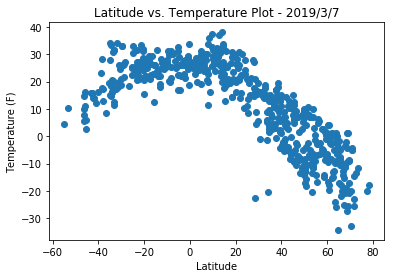

In [63]:
plt.scatter(lat, temp, marker='o');
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Latitude vs. Temperature Plot - {today}")
plt.savefig("Latitude_vs_Temperature", bbox_inches = 'tight')

#### Latitude vs. Humidity Plot

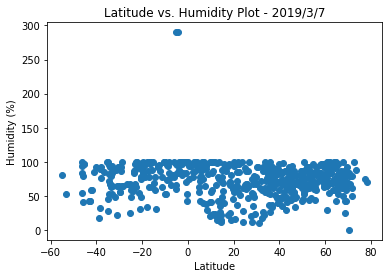

In [64]:
plt.scatter(lat, humid, marker='o');
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs. Humidity Plot - {today}")
plt.savefig("Latitude_vs_Humidity", bbox_inches = 'tight')

#### Latitude vs. Cloudiness Plot

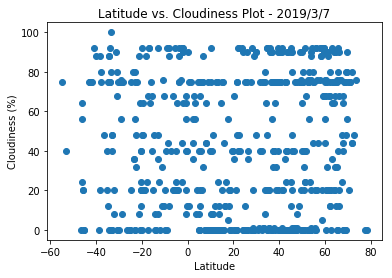

In [65]:
plt.scatter(lat, cloudy, marker='o');
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs. Cloudiness Plot - {today}")
plt.savefig("Latitude_vs_Cloudiness", bbox_inches = 'tight')

#### Latitude vs. Wind Speed Plot

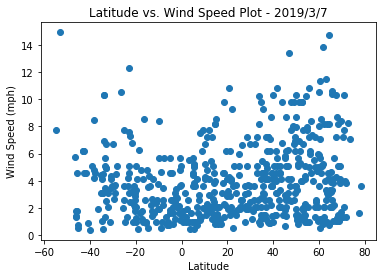

In [66]:
plt.scatter(lat, windy, marker='o');
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs. Wind Speed Plot - {today}") 
plt.savefig("Latitude_vs_WindSpeed", bbox_inches = 'tight')